## Introduction: Data Analysis of King County's Real Estate Market.

King county is a tech-driven economy that is home to high-tech hubs like Seattle, Bellevue and Redmond. This influential economy has undeniably contributed to a growing young population whose ultimate impact on urban development within the county cannot be understated. 

This project serves as a guidance to real estate developers in making informed decisions when strategizing their investments into King County's real estate sector. 


## Problem Statement:

*Understanding housing preference.*

**Background:** Real estate developers looking to expand their business in King County need a comprehensive understanding of the house pricing and structural preferences of the rising youth population. The aim is to provide data-driven analysis to serve as anchors for strategic planning.


## Objectives

1. Identify the major predictors of house pricing.
    * This analysis aims to identify the main factors influencing home pricing within the region.

2. Assess the environmental and structural impact on pricing.
    * Investigate the  structure of the house that are more likely to influence pricing.



## Imports

This is an inferential analysis, therefore it will heavily rely on statsmodels for statistical testing, modeling and analysis.

Below is a list of all the necessary imports:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings 


Load data: 

In [78]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:**  Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Whether the house is on a waterfront.
* **view:** Quality of view from house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house. Related to the construction and design of the house.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.


## EDA and Data Cleaning

Start with EDA to understand the DataFrame, identify inconsistencies and finally run a summary statistics which will determine how to rectify some of the inconsitencies.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Rectify data types in the following columns:
* **id:** **integer to object*
* **bathrooms:** **float to integer*
* **floors:** **float to integer*
* **grade:** **object to integer*
* **sqft_basement:** **object to float*
* **yr_built:** **integer to object*
* **yr_renovated:** **float to object*
* **zipcode:** **integer to object*
* **lat:** **integer to object*
* **long:** **integer to object*

In [81]:
# Convert floats to integers
floats_to_integers = ['bathrooms', 'floors']
df[floats_to_integers] = df[floats_to_integers].round().astype(int)

#convert sqft_basement object to float
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors= 'coerce')
df['sqft_basement'].fillna(0.0, inplace= True)

#convert date to object
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

All the data types are correctly rectified. 

Proceed to eliminating duplicates if there is any ...

In [82]:
df.duplicated().sum()

0

There are no duplicates, so get the df shape summary ...

In [83]:
df.shape

(21597, 21)

* **No. of Rows:** 21597 rows present in the DataFrame.
* **No. of Columns:** 21 columns (variables) present in the DataFrame.

Check for null values in the entire df ...

In [84]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Look at the entries of the objects with null, to decide on the best solution for the NaaNs in these columns ...

In [85]:
waterfront_count = df['waterfront'].value_counts()
view_count = df['view'].value_counts()
yr_renovated_count = df['yr_renovated'].value_counts()

print(waterfront_count)
print(view_count)
print(yr_renovated_count)

waterfront
NO     19075
YES      146
Name: count, dtype: int64
view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64
yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64


* **waterfront:** Replace NaN with 'UNKNOWN'.
* **view:** Replace NaN with 'UNRATED".
* **yr_renovated:** Replace missing data with the modal value.

In [86]:
# Create new variables for the missing values in 'waterfront' and 'view'.
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')
df['view'] =df['view'].fillna('UNRATED')

# Replace missing values with the modal value
yr_renovated_mode = df['yr_renovated'].mode().iloc[0]
df['yr_renovated'].fillna(yr_renovated_mode, inplace= True)

df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Data Mapping 
This is a necessary stage needed to convert categorical data into numeric data.

In [87]:
# Map Waterfront, view, condition, grade.

# Define a mapping for 'waterfront'
waterfront_mapping = {
    'NO' : -1,
    'UNKNOWN' : 0,
    'YES' : 1
}

# Apply the waterfront_mapping into 'waterfront'
df['waterfront'] = df['waterfront'].map(waterfront_mapping)

# Define a mapping for 'view'
view_mapping = {
    'NONE' : -1,
    'UNRATED' : 0,
    'FAIR' : 1,
    'AVERAGE' : 2,
    'GOOD' : 3,
    'EXCELLENT' : 4
}

#Apply view_mapping into 'view'
df['view'] = df['view'].map(view_mapping)

#Define mapping for 'condition'
condition_mapping = {
    'Poor' : 1,
    'Fair' : 2,
    'Average' : 3,
    'Good' : 4,
    'Very Good' : 5
}

#Apply condition_mapping into 'condition'
df['condition'] = df['condition'].map(condition_mapping)

#Define mapping for grade
grade_mapping = {
    '3 Poor' : 1,
    '4 Low' : 2,
    '5 Fair' : 3,
    '6 Low Average' : 4,
    '7 Average' : 5,
    '8 Good' : 6,
    '9 Better' : 7,
    '10 Very Good' : 8,
    '11 Excellent' : 9,
    '12 Luxury' : 10,
    '13 Mansion' : 11
}

#Apply grade_mapping into 'grade'
df['grade'] = df['grade'].map(grade_mapping)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Cardinality of the object columns

Use cardinality to make an informed data driven approach on the object columns to keep.

In [88]:
cardinality = df.select_dtypes(include= 'object').nunique()
cardinality 

Series([], dtype: float64)

Ids should be unique, however based on the cardinality, there exists duplicate rows with similar ids ...

In [89]:
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,2,1580,5000,1,-1,-1,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,2,1580,5000,1,-1,-1,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3,4290,12103,1,-1,3,...,9,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3,4290,12103,1,-1,3,...,9,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1,1240,12092,1,0,-1,...,4,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2,2680,5539,2,0,-1,...,6,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1,1200,2171,2,-1,-1,...,5,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1,1200,2171,2,-1,-1,...,5,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3,2780,6000,2,-1,-1,...,7,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Drop all the id duplicates ...

In [90]:
#Sort the df according to date
df = df.sort_values(by= 'date')

# Reset the index and drop the old one
df = df.reset_index(drop=True)

# Drop rows with duplicate ids but keep the last row.
df = df.drop_duplicates(subset='id', keep='last')
df.shape

(21420, 21)

## Feature Engineering

Create a variable that sums up the total sqft of the house ...

* **Total Square Foot (total_sqft)** = sqft_above + sqft_basement

Drop the sqft_above and the sqft_basement.

In [91]:
#Calculate the total sqft of the house.
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

#drop the sqft_above and the sqft_basement
df = df.drop(columns=['sqft_above', 'sqft_basement'])


Create a variable that sums up the age of the house

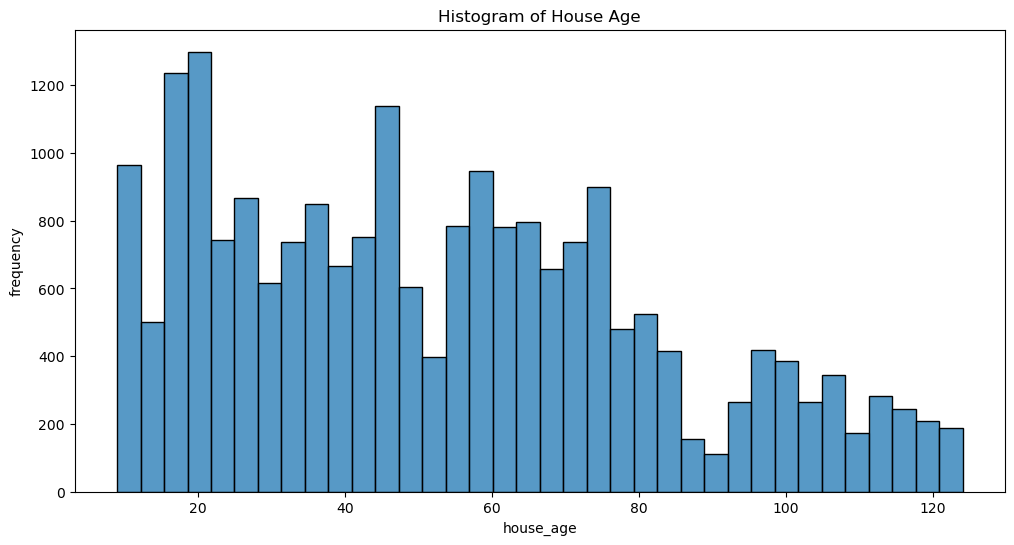

In [92]:
df['house_age'] = 2024 - df['yr_built']

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['house_age'])
    plt.title('Histogram of House Age')
    plt.xlabel('house_age')
    plt.ylabel('frequency')

plt.show()

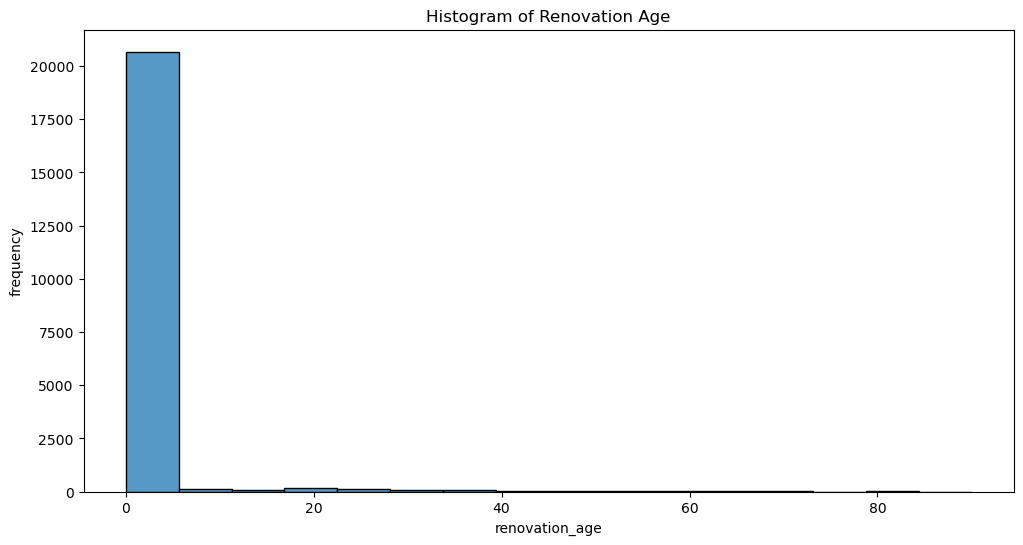

In [93]:
# Variable to sum up renovation age
df['renovation_age'] = df.apply(lambda row: 2024 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)
df['renovation_age'] = df['renovation_age'].round().astype(int)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['renovation_age'])
    plt.title('Histogram of Renovation Age')
    plt.xlabel('renovation_age')
    plt.ylabel('frequency')

plt.show()


To eliminate the problem of redundancy in the dataframe, here some other columns that will be dropped:
* date - Not all houses were sold.
* zipcode - Use ID as a unique identifier instead.
* lat - Use ID as a unique identifier.
* long - Use ID as a unique identifier.

In [94]:
df = df.drop(columns= ['date', 'zipcode', 'lat', 'long'])
df = df.astype({
    'yr_built': object,
    'id' : object,
    'yr_renovated' : object
})

df.shape

(21420, 18)


## Pair plot

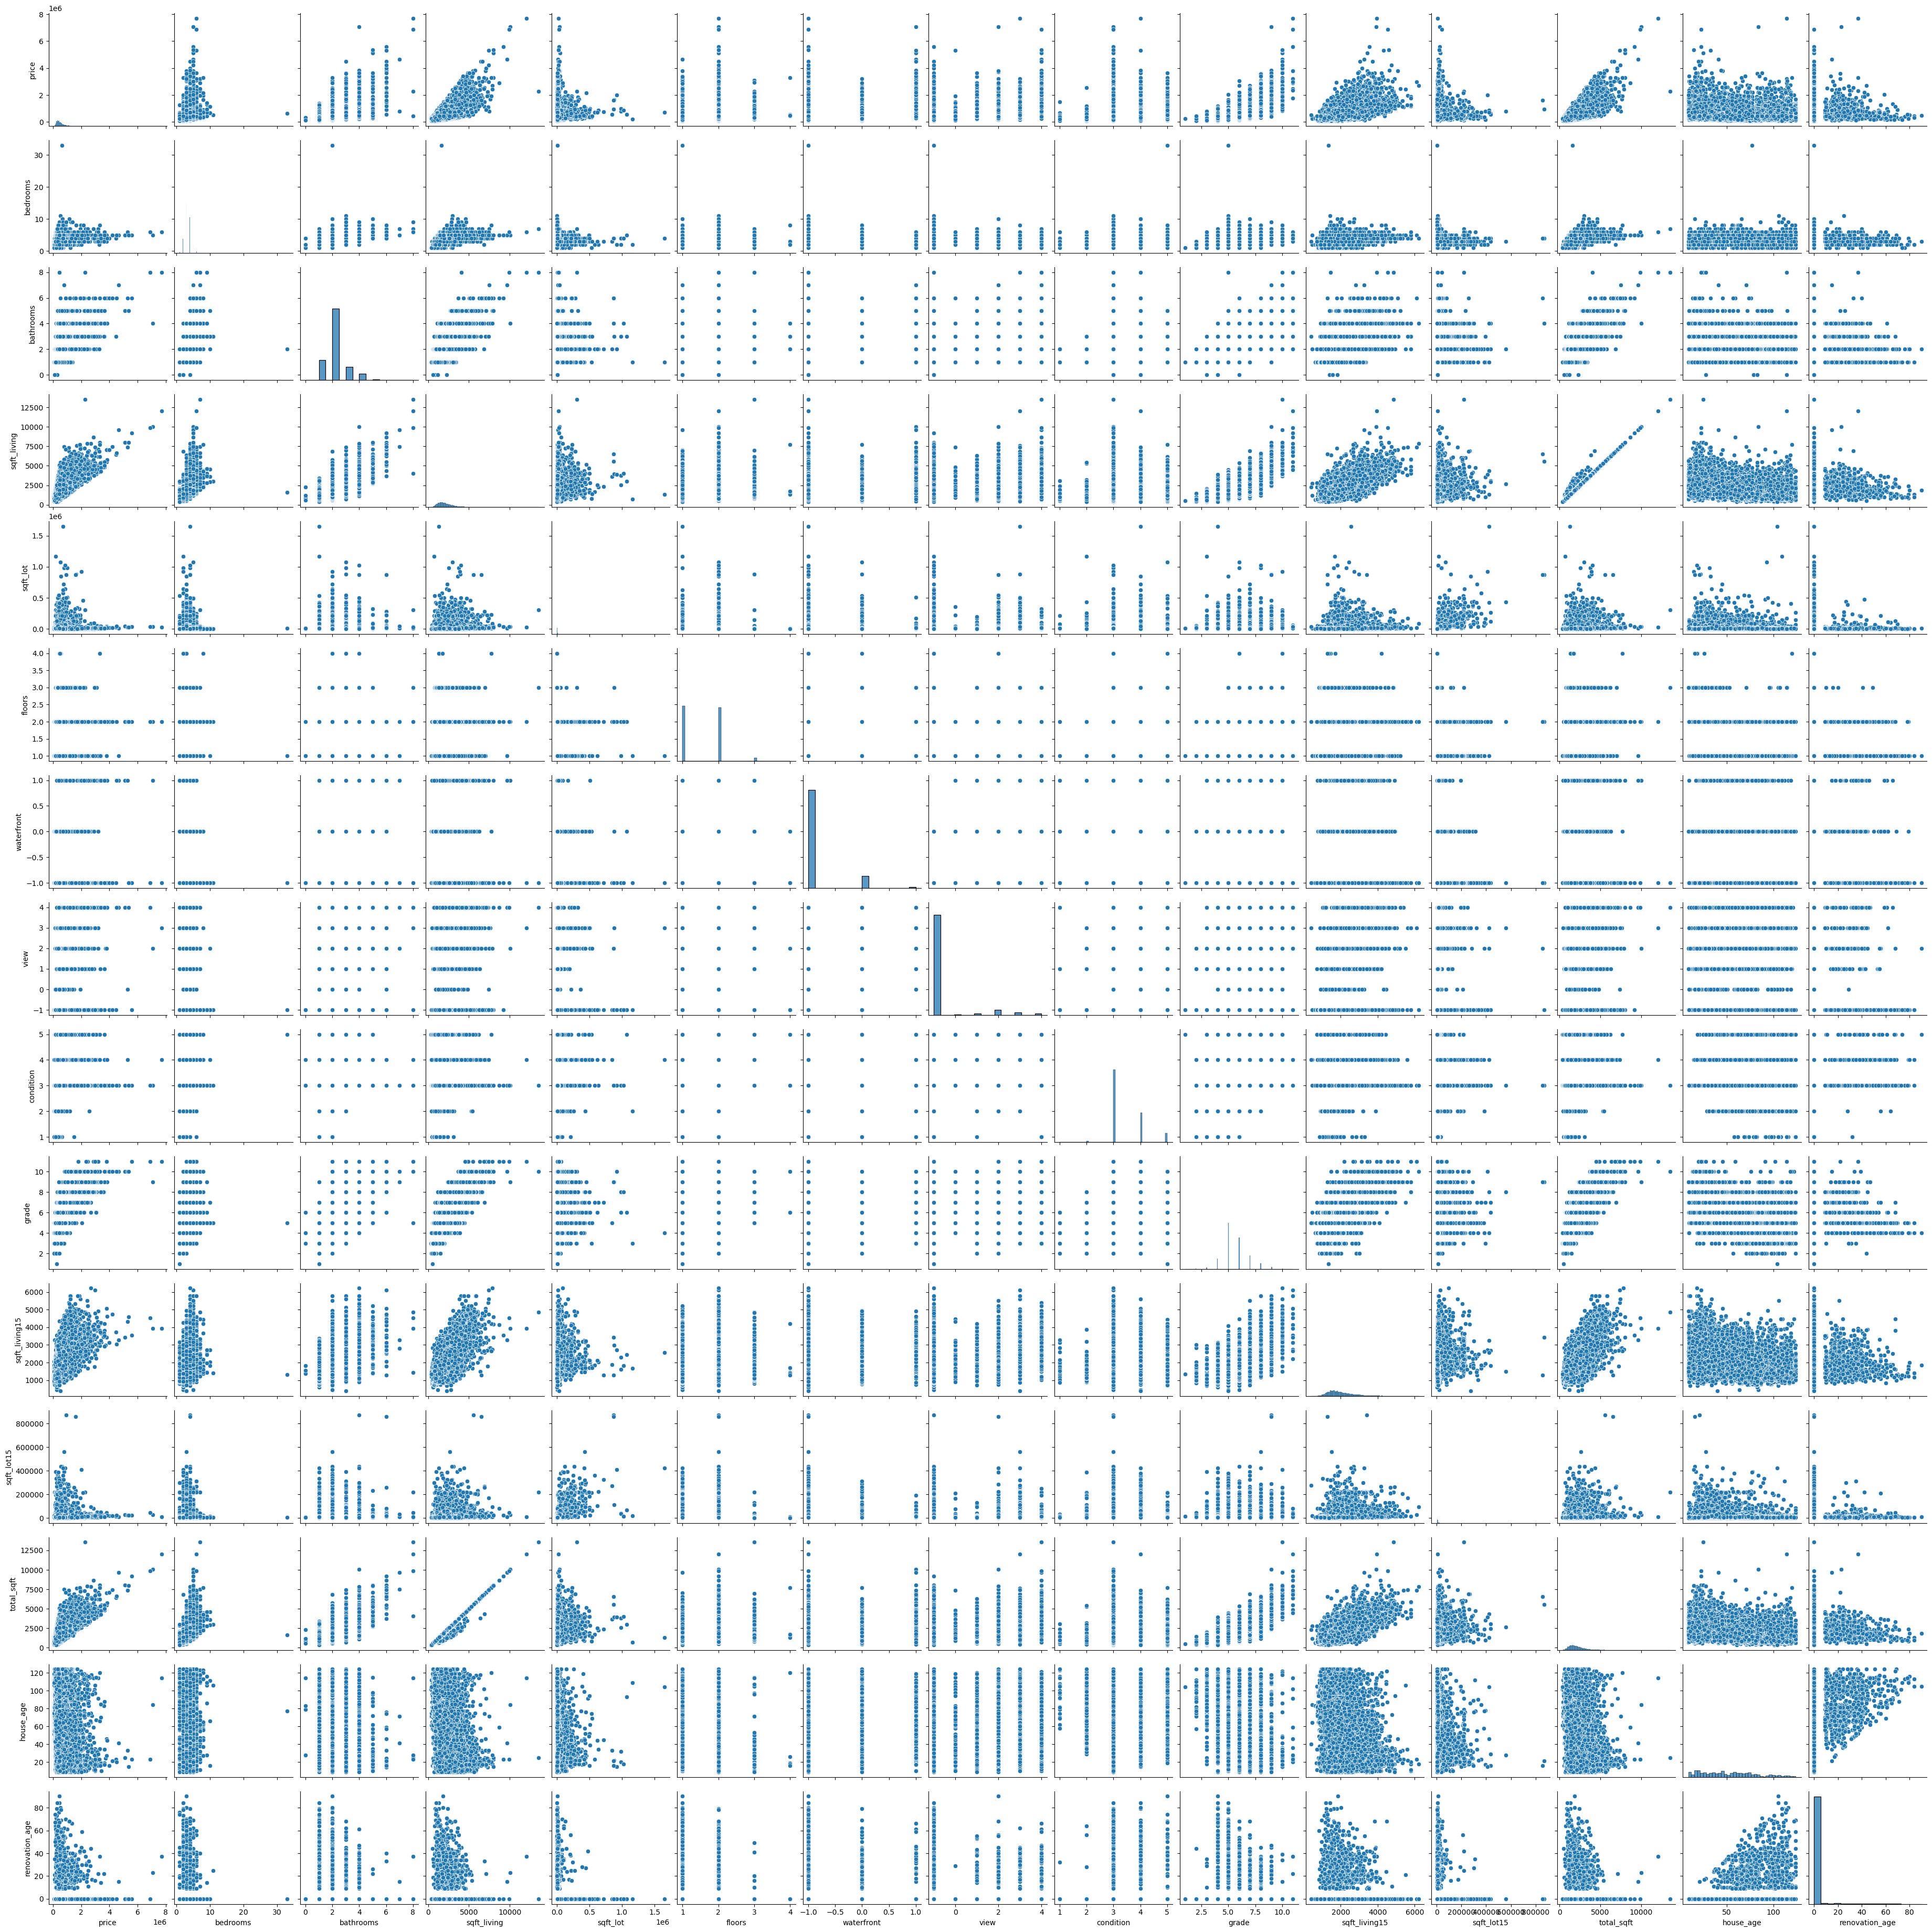

In [95]:
numeric_df = df.select_dtypes(include='number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    sns.pairplot(numeric_df)


## Outliers

* Numeric data

Looking at the above pairplot, most of the numeric data has skewed distribution. Therefore, check for outliers and decide on how to handle them based on the distribution of the data.

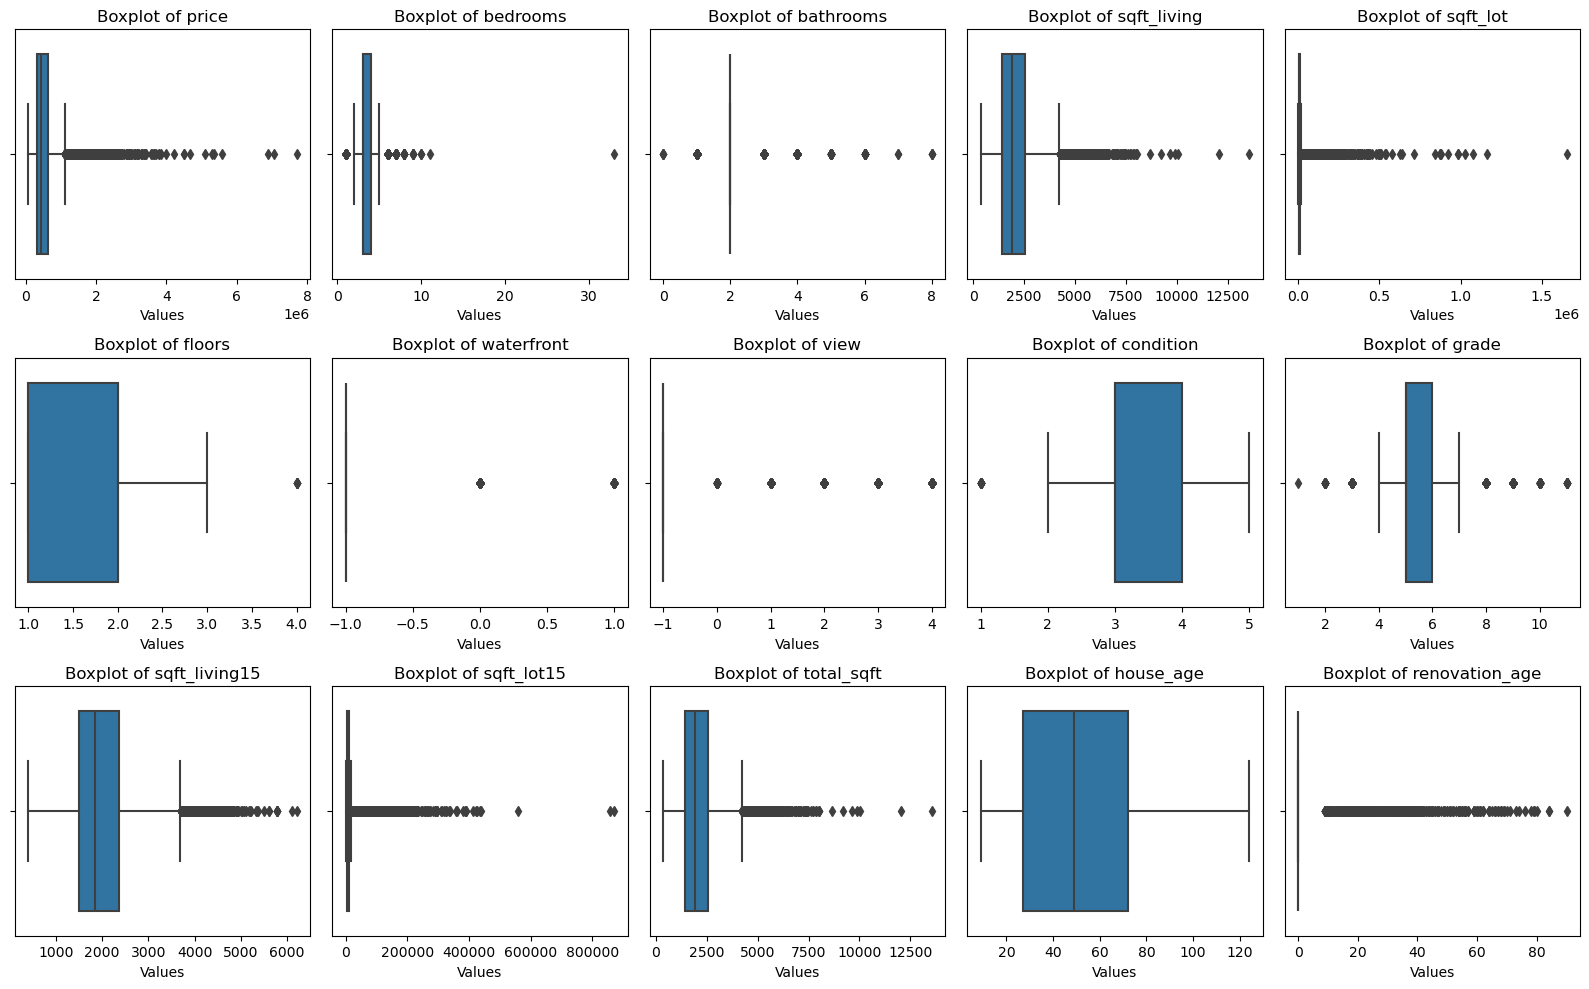

In [96]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [97]:
bathroom_count = df['bathrooms'].value_counts()
bathroom_count

bathrooms
2    13745
1     3873
3     2515
4     1196
5       57
6       24
8        4
0        4
7        2
Name: count, dtype: int64

Eliminate outliers from the following columns;

* **bedrooms*
* **floors*
* **sqft_lot*
* **sqft_lot15*

In [98]:
outlier_df = df[['bedrooms', 'floors', 'sqft_lot', 'sqft_lot15']]

#calculate IQR for selected columns
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((outlier_df < lower_bound) | (outlier_df > upper_bound)).any(axis=1)


outlier_indices = outlier_df.index[outliers]

# Remove all the outliers
df = df.drop(outlier_indices)

df.shape

(18300, 18)

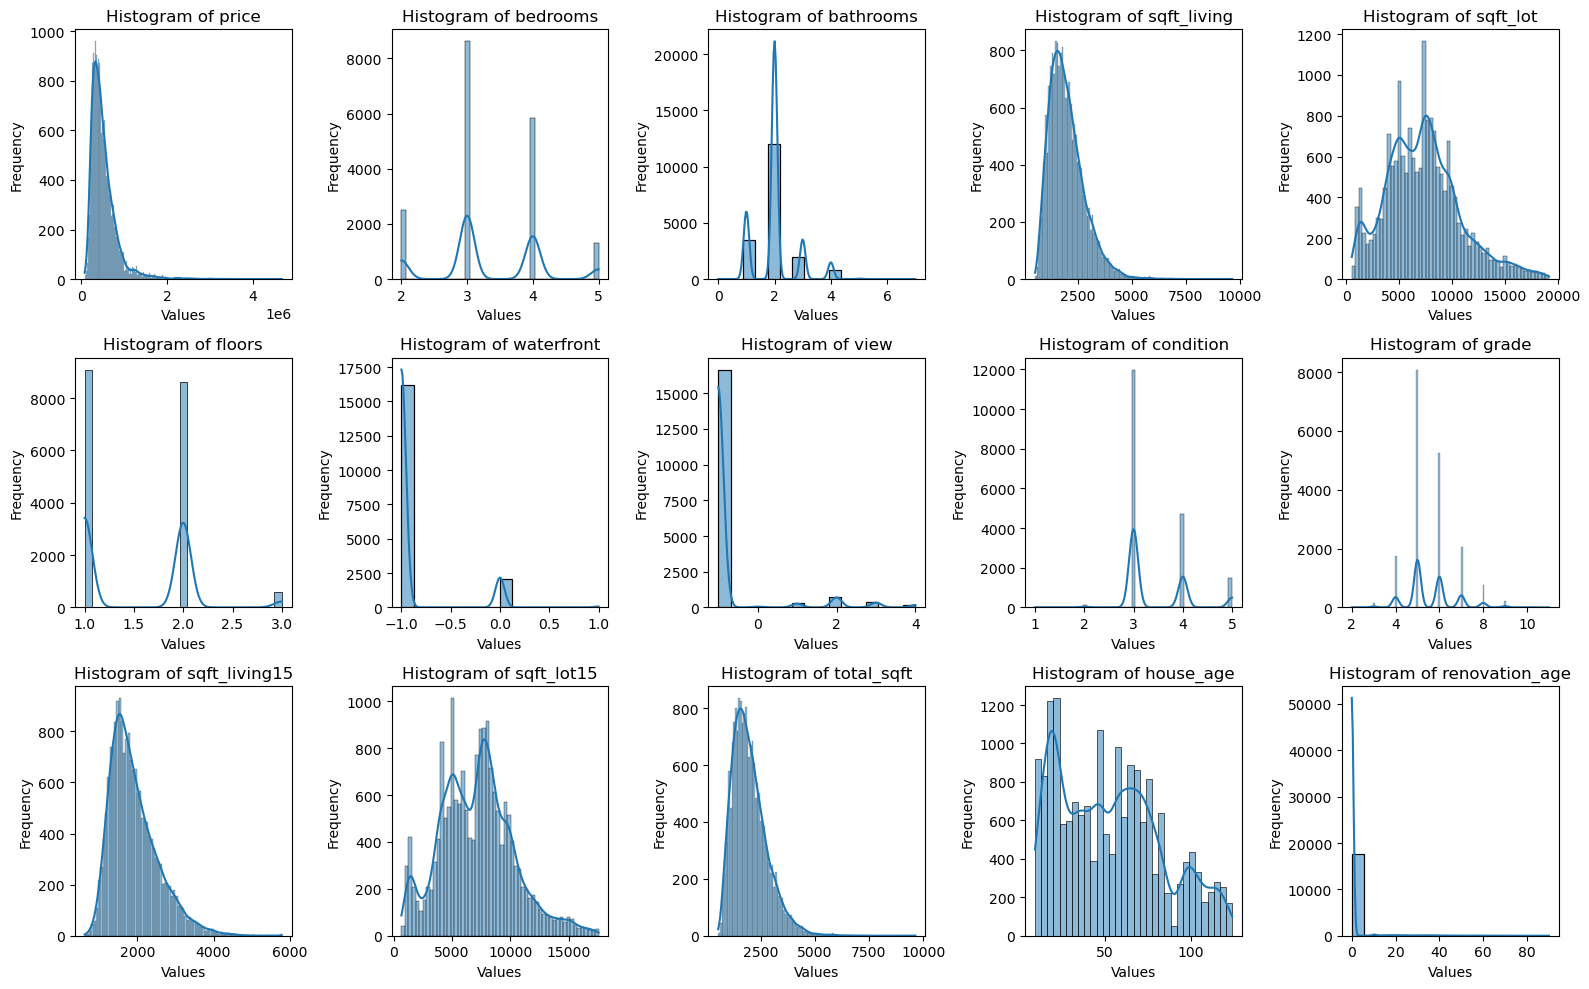

In [99]:
numeric_df = df.select_dtypes(include='number')

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(16, 10))
    
    for i, col in enumerate(numeric_df.columns):
        plt.subplot(3, 5, i + 1)
        sns.histplot(numeric_df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

In [100]:
desc = numeric_df.describe()

numeric_df_median = numeric_df.median()
numeric_df_mode = numeric_df.mode().iloc[0]

# Add median and mode to the statistics
desc.loc['median'] = numeric_df_median
desc.loc['mode'] = numeric_df_mode

desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,total_sqft,house_age,renovation_age
count,1.830000e+04,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000
mean,5.138201e+05,3.325355,2.018251,1981.045355,7272.651475,1.535519,-0.882404,-0.713497,3.411202,5.576612,1913.488415,7136.967760,1975.697596,53.242459,0.855027
std,3.104003e+05,0.799777,0.704335,803.777489,3503.735095,0.559870,0.332160,0.958704,0.649721,1.069159,630.345843,3135.212223,804.014378,30.068364,5.518448
min,7.800000e+04,2.000000,0.000000,520.000000,520.000000,1.000000,-1.000000,-1.000000,1.000000,2.000000,620.000000,651.000000,520.000000,9.000000,0.000000
25%,3.150000e+05,3.000000,2.000000,1400.000000,4859.750000,1.000000,-1.000000,-1.000000,3.000000,5.000000,1460.000000,5000.000000,1390.000000,25.000000,0.000000
50%,4.399250e+05,3.000000,2.000000,1840.000000,7200.000000,2.000000,-1.000000,-1.000000,3.000000,5.000000,1780.000000,7210.000000,1830.000000,51.000000,0.000000
75%,6.200000e+05,4.000000,2.000000,2420.000000,9292.000000,2.000000,-1.000000,-1.000000,4.000000,6.000000,2250.000000,9000.000000,2410.000000,73.000000,0.000000
max,4.670000e+06,5.000000,7.000000,9640.000000,19163.000000,3.000000,1.000000,4.000000,5.000000,11.000000,5790.000000,17550.000000,9640.000000,124.000000,90.000000
median,4.399250e+05,3.000000,2.000000,1840.000000,7200.000000,2.000000,-1.000000,-1.000000,3.000000,5.000000,1780.000000,7210.000000,1830.000000,51.000000,0.000000
mode,3.500000e+05,3.000000,2.000000,1300.000000,5000.000000,1.000000,-1.000000,-1.000000,3.000000,5.000000,1540.000000,5000.000000,1300.000000,10.000000,0.000000


In [101]:
numeric_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,total_sqft,house_age,renovation_age
price,1.000000,0.301681,0.488942,0.673317,0.098143,0.252424,0.065624,0.381943,0.041431,0.659532,0.564097,0.098298,0.671391,-0.022538,0.077349
bedrooms,0.301681,1.000000,0.470054,0.607096,0.226201,0.179224,-0.005382,0.079765,0.013851,0.361907,0.432076,0.214869,0.603174,-0.176652,-0.007452
bathrooms,0.488942,0.470054,1.000000,0.674902,0.054130,0.333308,0.014885,0.188592,-0.076587,0.572745,0.489128,0.050723,0.671836,-0.386936,0.023556
sqft_living,0.673317,0.607096,0.674902,1.000000,0.261832,0.320065,0.025976,0.272855,-0.071229,0.737973,0.760747,0.249003,0.996467,-0.318892,0.022030
sqft_lot,0.098143,0.226201,0.054130,0.261832,1.000000,-0.340574,0.023815,0.107436,0.112425,0.121405,0.297213,0.877659,0.261182,0.033146,0.002374
floors,0.252424,0.179224,0.333308,0.320065,-0.340574,1.000000,0.005161,0.018252,-0.239434,0.416959,0.240893,-0.346368,0.322322,-0.391466,0.006097
waterfront,0.065624,-0.005382,0.014885,0.025976,0.023815,0.005161,1.000000,0.108362,-0.000736,0.016947,0.026913,0.033215,0.026471,0.005670,0.028888
view,0.381943,0.079765,0.188592,0.272855,0.107436,0.018252,0.108362,1.000000,0.037380,0.243745,0.280910,0.112045,0.270093,0.064282,0.073453
condition,0.041431,0.013851,-0.076587,-0.071229,0.112425,-0.239434,-0.000736,0.037380,1.000000,-0.169375,-0.109395,0.116827,-0.073773,0.383791,-0.023062
grade,0.659532,0.361907,0.572745,0.737973,0.121405,0.416959,0.016947,0.243745,-0.169375,1.000000,0.692310,0.130714,0.737197,-0.448289,-0.013145


## Feature selection

In [102]:
numeric_df.corr()['price']

price             1.000000
bedrooms          0.301681
bathrooms         0.488942
sqft_living       0.673317
sqft_lot          0.098143
floors            0.252424
waterfront        0.065624
view              0.381943
condition         0.041431
grade             0.659532
sqft_living15     0.564097
sqft_lot15        0.098298
total_sqft        0.671391
house_age        -0.022538
renovation_age    0.077349
Name: price, dtype: float64

In [103]:
correlations = numeric_df.drop("price", axis=1).corr().sum() / 14
correlations

bedrooms          0.285624
bathrooms         0.291453
sqft_living       0.395630
sqft_lot          0.217017
floors            0.108889
waterfront        0.093585
view              0.204083
condition         0.064334
grade             0.314364
sqft_living15     0.346391
sqft_lot15        0.215947
total_sqft        0.394585
house_age        -0.048638
renovation_age    0.093559
dtype: float64

To eliminate the problem of multicollinearity, the following columns will be dropped from the dataframe:
total_sqft, renovation_age, sqft_lot15, sqft_living15.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18300 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              18300 non-null  object 
 1   price           18300 non-null  float64
 2   bedrooms        18300 non-null  int64  
 3   bathrooms       18300 non-null  int32  
 4   sqft_living     18300 non-null  int64  
 5   sqft_lot        18300 non-null  int64  
 6   floors          18300 non-null  int32  
 7   waterfront      18300 non-null  int64  
 8   view            18300 non-null  int64  
 9   condition       18300 non-null  int64  
 10  grade           18300 non-null  int64  
 11  yr_built        18300 non-null  object 
 12  yr_renovated    18300 non-null  object 
 13  sqft_living15   18300 non-null  int64  
 14  sqft_lot15      18300 non-null  int64  
 15  total_sqft      18300 non-null  float64
 16  house_age       18300 non-null  int64  
 17  renovation_age  18300 non-null  int3

In [105]:
numeric_df = df.select_dtypes(include='number')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18300 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           18300 non-null  float64
 1   bedrooms        18300 non-null  int64  
 2   bathrooms       18300 non-null  int32  
 3   sqft_living     18300 non-null  int64  
 4   sqft_lot        18300 non-null  int64  
 5   floors          18300 non-null  int32  
 6   waterfront      18300 non-null  int64  
 7   view            18300 non-null  int64  
 8   condition       18300 non-null  int64  
 9   grade           18300 non-null  int64  
 10  sqft_living15   18300 non-null  int64  
 11  sqft_lot15      18300 non-null  int64  
 12  total_sqft      18300 non-null  float64
 13  house_age       18300 non-null  int64  
 14  renovation_age  18300 non-null  int32  
dtypes: float64(2), int32(3), int64(10)
memory usage: 2.0 MB


## Modeling

*a. Statsmodel*


Build a simple linear regression model using statsmodel ...

In [106]:
simple_formula = 'price ~ sqft_living'
simple_model = ols(simple_formula, numeric_df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 1.518e+04
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:35:17   Log-Likelihood:            -2.5185e+05
No. Observations:               18300   AIC:                         5.037e+05
Df Residuals:                   18298   BIC:                         5.037e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1290.0285   4512.549     -0.286      0.775   -1.01e+04    7554.990
sqft_living   260.0194      2.111    123.188      0.000     255.882     264.157
==============================================================================
Omnibus:                     8562.054   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97445.008
Skew:                           1.958   Prob(JB):                         0.00
Kurtosis:                      13.605   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Build a multiple regression model using statsmodel ...

In [107]:
multiple_formula = 'price ~ sqft_living + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + house_age + total_sqft + renovation_age + sqft_lot15 + sqft_living15'
multiple_model = ols(multiple_formula, numeric_df).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2325.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:35:17   Log-Likelihood:            -2.4803e+05
No. Observations:               18300   AIC:                         4.961e+05
Df Residuals:                   18285   BIC:                         4.962e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.578e+05   1.52e+04    -43.276      0.000   -6.88e+05   -6.28e+05
sqft_living      111.2921     20.666      5.385      0.000      70.786     151.799
bedrooms       -3.971e+04   2245.699    -17.681      0.000   -4.41e+04   -3.53e+04
bathrooms       4.269e+04   2827.094     15.100      0.000    3.71e+04    4.82e+04
sqft_lot          -5.2568      0.834     -6.302      0.000      -6.892      -3.622
floors          1.437e+04   3190.822      4.504      0.000    8116.668    2.06e+04
waterfront      2.891e+04   4173.648      6.926      0.000    2.07e+04    3.71e+04
view            4.108e+04   1557.984     26.368      0.000     3.8e+04    4.41e+04
condition       2.171e+04   2349.049      9.241      0.000    1.71e+04    2.63e+04
grade           1.261e+05   2200.454     57.307      0.000    1.22e+05     1.3e+05
house_age       3300.8827     59.937     55.072      0.000    3183.400    3418.366
total_sqft        40.0277     20.445      1.958      0.050      -0.047      80.102
renovation_age   161.1044    258.218      0.624      0.533    -345.028     667.236
sqft_lot15        -1.8782      0.942     -1.993      0.046      -3.725      -0.031
sqft_living15     25.6889      3.686      6.968      0.000      18.463      32.915
==============================================================================
Omnibus:                     9248.183   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158489.515
Skew:                           2.023   Prob(JB):                         0.00
Kurtosis:                      16.838   Cond. No.                     1.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*b. Scikit-learn*

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [109]:
# Data preparation

y = df['price']
x = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'house_age', 'total_sqft', 'renovation_age', 'sqft_lot15', 'sqft_living15']]

In [110]:
# Test train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 42)

In [111]:
# Standardize x variables
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [112]:
# Modeling
model = LinearRegression()

# Train the model
model.fit(x_train_scaled, y_train)

LinearRegression()

In [113]:
# y predictions
y_pred = model.predict(x_test_scaled)
df_y_pred = pd.DataFrame({"true":y_test, "pred": y_pred})
df_y_pred.head()


,true,pred
4927,557500.0,7.297523e+05
10182,1030000.0,1.465357e+06
9119,885000.0,8.270227e+05
5684,810000.0,9.383133e+05
18808,270000.0,2.586511e+05


In [114]:
# Validate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse:', mse)
print('mae:', mae)
print('r2', r2)


mse: 32604231808.422863
mae: 125103.60657584212
r2 0.6450239491443077


Mean Square Error: 32604231808.422863
This indicates a very large discrepancy between the actual and predicted price values.

Mean Absolute Error: 125103.60657584212
On average the predictions of this model are off by 125103.61 units.

R2 Score: 0.6450239491443077
This model has a 64.5% fit to the data.